<a href="https://colab.research.google.com/github/AndreaCamilloni/BigDataInMediaTechnology/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emoji
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 26.5 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=a2b624145280df0d45484acf722eddb78f1dbf98822f027971e149208f6b5f1e
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 21.5 MB/s 
     |████████████████████████████████| 287 kB 51.6 MB/s 


In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
path = "/content/drive/MyDrive/Group2/Lab1/"

train_data = pd.read_csv(path + 'train.csv')
test_data = pd.read_csv(path + 'test.csv')
valid_data = pd.read_csv(path + 'evaluation.csv')

train_data.size, test_data.size, valid_data.size

(15000, 5000, 10000)

# Data Visualization

In [5]:
print("Distribution of the scores")
print("Training data: ",train_data[train_data.score==1].score.count(),"," ,train_data[train_data.score==0].score.count())
print("Test data: ", test_data[test_data.score==1].score.count(), "," , test_data[test_data.score==0].score.count())
print("Validation data: ",valid_data[valid_data.score==1].score.count(), "," , valid_data[valid_data.score==0].score.count())

Distribution of the scores
Training data:  3752 , 3748
Test data:  1248 , 1252
Validation data:  2518 , 2482


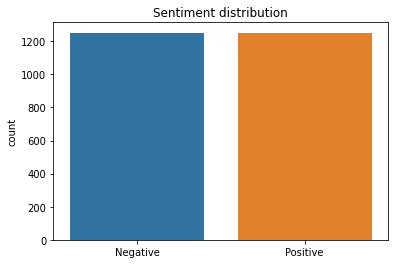

In [6]:
f = sns.countplot(x='score', data=test_data)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

In [7]:
pd.set_option('display.max_columns', None) #for display purpose
train_data.head(20)

,score,text
0,0,"overgeneralized, not helpful to anyone serious..."
1,1,Great sound and service.
2,1,love this book!!!: this book is a fast read ab...
3,1,A hugely enjoyable screen version of Rona Jaff...
4,0,What an uninteresting hodge-podge. It could ha...
5,1,@USAirways customer service at its best! Rache...
6,0,@VirginAmerica Is it normal to receive no repl...
7,0,Imagine the worst skits from Saturday Night Li...
8,0,This is one of the worst films ever. I like ch...
9,1,@JetBlue flight attendant Wendi on Flt 127 on ...


# Pre-processing


*   Emojis and hashtags extraction
*   Data cleaning: html tags, new lines, http links, mentions, hashtags, emojis, contractions, punctuations, numbers, upper case letters and stop words



In [8]:
import re
import emoji

In [9]:
def extract_emojis(text):
  return ','.join(c for c in text if c in emoji.EMOJI_DATA)

def extract_hash_tags(s):
    return ','.join(part[1:] for part in s.split() if part.startswith('#'))


train_data['emoji']=train_data['text'].apply(lambda f : extract_emojis(f))
train_data['hashtags']=train_data['text'].apply(lambda f : extract_hash_tags(f))

test_data['emoji']=test_data['text'].apply(lambda f : extract_emojis(f))
test_data['hashtags']=test_data['text'].apply(lambda f : extract_hash_tags(f))

valid_data['emoji']=valid_data['text'].apply(lambda f : extract_emojis(f))
valid_data['hashtags']=valid_data['text'].apply(lambda f : extract_hash_tags(f))


In [10]:
import string
import contractions

def preprocess(s):
    #remove html tags
    CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    result = re.sub(CLEANR,'',s)
    #remove newline 
    result = re.sub(r'\\t|\\n|\\r", "\t|\n|\r', '', result) 
    #remove http link
    result = re.sub(r'http\S+', '', result)
    #remove mention
    result = re.sub(r'@\S+', '', result)
    #remove hashtags
    result = re.sub(r'#\S+', '', result)
    #remove emojis
    CLEANR = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    result = re.sub(CLEANR, '', result)
    #remove contractions
    result = contractions.fix(result)
    #remove punctuation
    result = result.translate(str.maketrans(' ', ' ', string.punctuation))

    #remove number
    result = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", result)
    

    return result


train_data['text_preprocessed']=train_data['text'].apply(lambda f : preprocess(f))
test_data['text_preprocessed']=test_data['text'].apply(lambda f : preprocess(f))
valid_data['text_preprocessed']=valid_data['text'].apply(lambda f : preprocess(f))


In [11]:
train_data.head(50) 

,score,text,emoji,hashtags,text_preprocessed
0,0,"overgeneralized, not helpful to anyone serious...",,,overgeneralized not helpful to anyone seriousl...
1,1,Great sound and service.,,,Great sound and service
2,1,love this book!!!: this book is a fast read ab...,,,love this book this book is a fast read about ...
3,1,A hugely enjoyable screen version of Rona Jaff...,,,A hugely enjoyable screen version of Rona Jaff...
4,0,What an uninteresting hodge-podge. It could ha...,,,What an uninteresting hodgepodge It could have...
5,1,@USAirways customer service at its best! Rache...,,,customer service at its best Rachel S took g...
6,0,@VirginAmerica Is it normal to receive no repl...,,"baggageissues,smh",Is it normal to receive no reply from Central...
7,0,Imagine the worst skits from Saturday Night Li...,,,Imagine the worst skits from Saturday Night Li...
8,0,This is one of the worst films ever. I like ch...,,,This is one of the worst films ever I like che...
9,1,@JetBlue flight attendant Wendi on Flt 127 on ...,"👍,👍",,flight attendant Wendi on Flt on Newark to Or...


# Model

In [20]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

vectorizer = TfidfVectorizer()
train_text = vectorizer.fit_transform(train_data['text_preprocessed'])
test_text = vectorizer.transform(test_data['text_preprocessed'])
valid_text = vectorizer.transform(valid_data['text_preprocessed'])


In [21]:
classifier = SVC()
classifier.fit(train_text, train_data.score)

SVC()

# Prediction on test dataset

In [22]:
y_hat = classifier.predict(test_text)

In [24]:
accuracy_score(test_data['score'], y_hat)

0.8492

In [23]:
print(classification_report(test_data['score'], y_hat))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1252
           1       0.87      0.83      0.85      1248

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



In [25]:
cnf_matrix = confusion_matrix(test_data.score, y_hat)
cnf_matrix

array([[1092,  160],
       [ 217, 1031]])

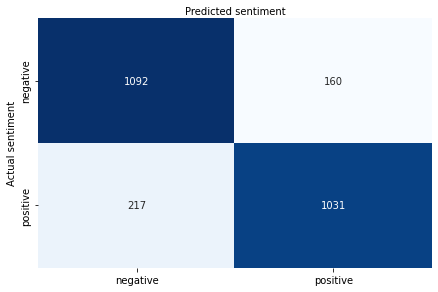

In [26]:
class_names = ["negative", "positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');

# Prediction on Validation Dataset

In [27]:
X_valid, y_valid = valid_text, valid_data['score'].values

In [28]:
y_hat_valid = classifier.predict(X_valid)

In [29]:
accuracy_score(y_valid, y_hat_valid)

0.8462

In [30]:
print(classification_report(y_valid, y_hat_valid))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2482
           1       0.87      0.81      0.84      2518

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [31]:
cnf_matrix = confusion_matrix(y_valid, y_hat_valid)
cnf_matrix

array([[2184,  298],
       [ 471, 2047]])

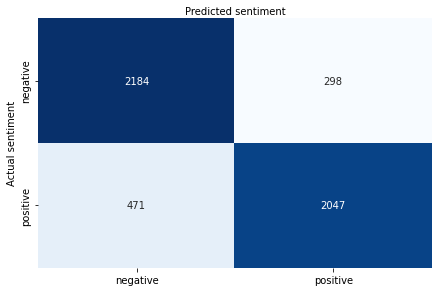

In [32]:
class_names = ["negative", "positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');